# Random Forest(Assignment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [5]:
df = pd.read_excel('glass.xlsx', sheet_name = 'glass') # Reading xlsx document
df.to_csv('glass.csv', index = False) # Saving as csv file

In [6]:
df = pd.read_csv('glass.csv') # Reading csv file

In [15]:
df.shape

(214, 10)

In [7]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

## Checking for duplicates

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [13]:
df.loc[df.duplicated()] # Returns duplicated cell

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(213, 10)

## Checking for NULL values

In [22]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

NO NULL values

## Visualizing the features

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

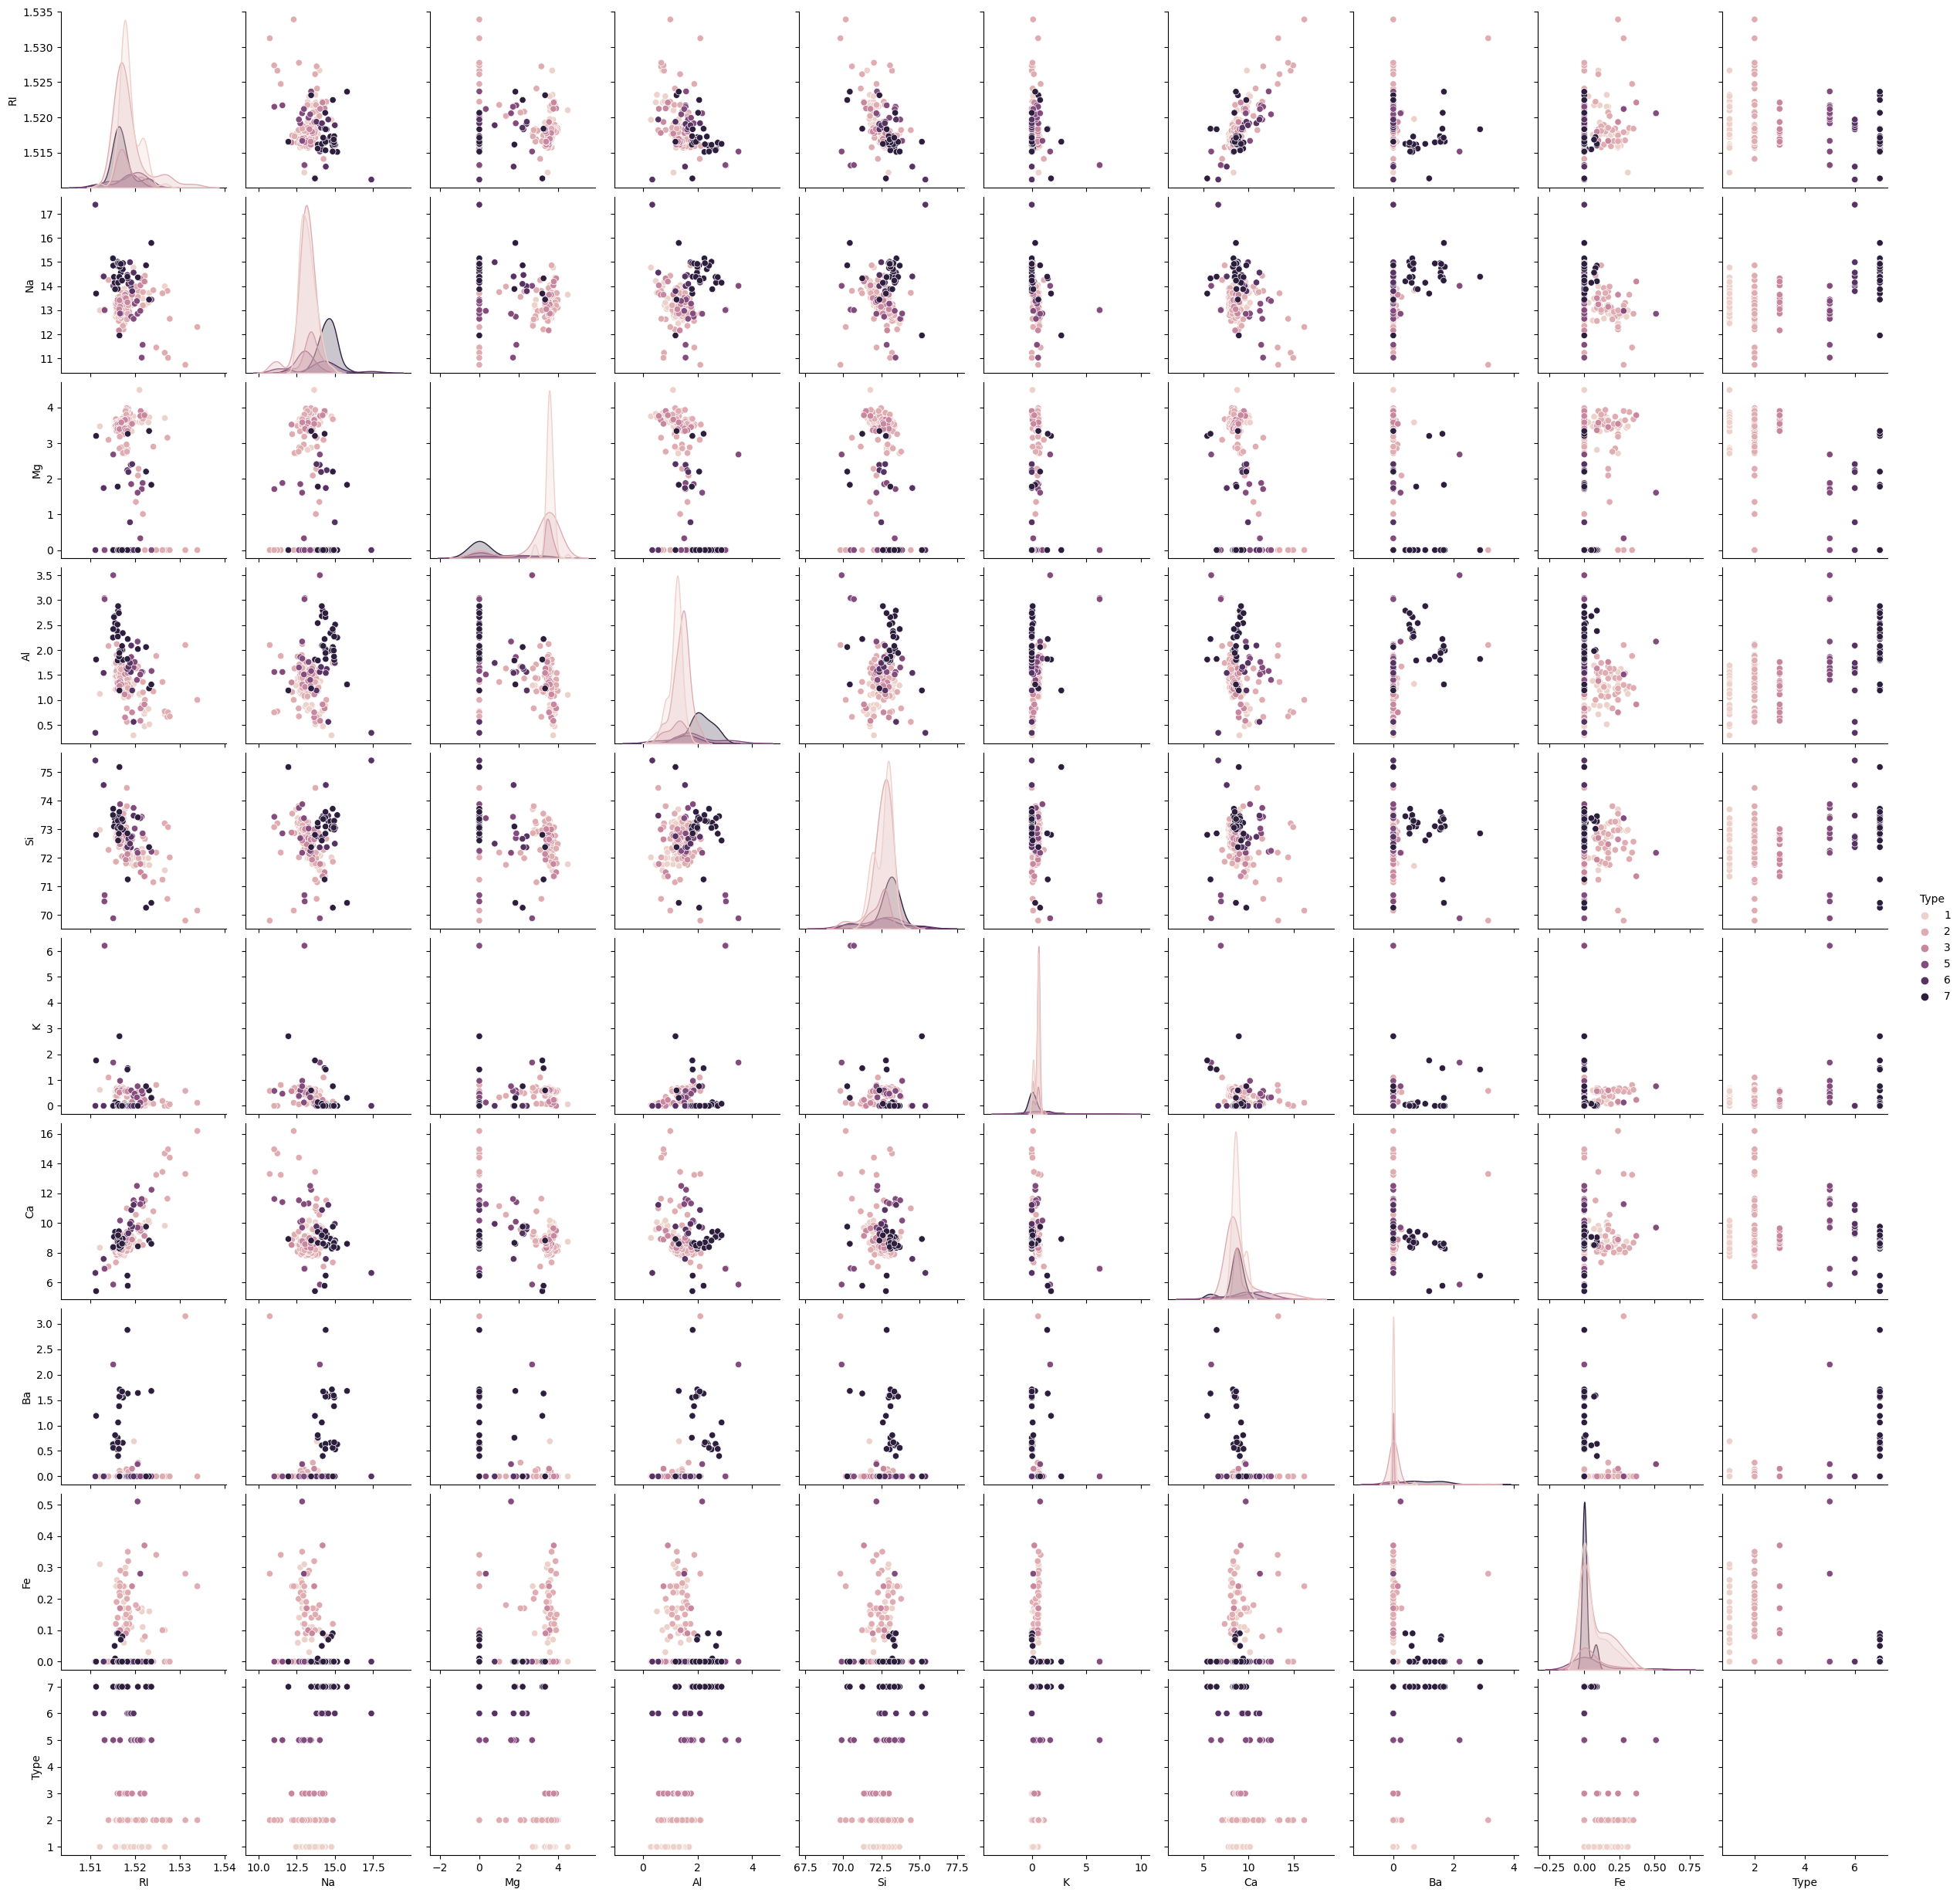

In [25]:
sns.pairplot(df, vars = (df.columns), 
             hue = 'Type')
plt.show()

<Axes: >

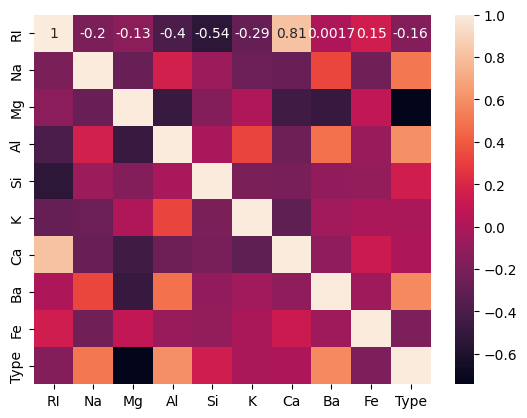

In [26]:
# Finding correlation between features
correlation = df[(df.columns)].corr()

sns.heatmap(correlation, annot = True)

## Split the dataset

In [56]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Type']) # Features
y = df['Type'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the model (Random Forest)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = rf_model.predict(X_test)

## Model evaluation

In [44]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy Score = \n', accuracy_score(y_test, y_pred))
print('Classification Report = \n', classification_report(y_test, y_pred))

Accuracy Score = 
 0.7674418604651163
Classification Report = 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.77        43
   macro avg       0.81      0.70      0.74        43
weighted avg       0.78      0.77      0.76        43



## Boosting

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [47]:
y_pred = ada_model.predict(X_test)

## Model evaluation

In [48]:
print('Accuracy Score = \n', accuracy_score(y_test, y_pred))
print('Classification Report = \n', classification_report(y_test, y_pred))

Accuracy Score = 
 0.7674418604651163
Classification Report = 
               precision    recall  f1-score   support

           1       0.62      1.00      0.77        10
           2       0.75      0.80      0.77        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.77        43
   macro avg       0.56      0.61      0.58        43
weighted avg       0.69      0.77      0.72        43



C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Bagging

In [54]:
from sklearn.ensemble import BaggingClassifier

#Using Logistic Regression as base model
from sklearn.linear_model import LogisticRegression

In [51]:
base_model = LogisticRegression()

bagging_model = BaggingClassifier(estimator = base_model, n_estimators = 100, random_state = 42)

bagging_model.fit(X_train, y_train)

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

In [52]:
y_pred = bagging_model.predict(X_test)

## Model Evaluation

In [55]:
print('Accuracy Score = \n', accuracy_score(y_test, y_pred))
print('Classification Report = \n', classification_report(y_test, y_pred))

Accuracy Score = 
 0.7441860465116279
Classification Report = 
               precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       0.60      1.00      0.75         3
           6       1.00      0.33      0.50         3
           7       1.00      0.89      0.94         9

    accuracy                           0.74        43
   macro avg       0.67      0.64      0.62        43
weighted avg       0.74      0.74      0.72        43



# Questions

### Q. Explain Bagging and Boosting methods. How is it different from each other.

Bagging:

Bagging trains multiple base learners independently on randomly drawn subsets of the training data, and then aggregates their predictions. eg- Random Forest

Boosting:

Boosting trains models sequentially, where each new model tries to correct the errors made by the previous ones. It focuses more on the data points that were misclassified or predicted poorly. eg- AdaBoost

Difference - 

Bagging is useful when your base models are high variance, low bias (e.g., decision trees).

Boosting is more effective when you want to build a stronger learner from several weak ones and are willing to trade more complexity for better accuracy.

### Q. Explain how to handle imbalance in the data.

Handling imbalance in the data is a challenge, here are a few techniques to help address the issue-

1. Resampling Techniques (Oversampling and undersampling)

2. Use Appropriate Evaluation Metrics (eg: F1-Score, precision, recall etc.)